## Walton Stock Price Forecasting and Analysis.

In [100]:
import pandas as pd
import ta
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

### Data Preprocessing

In [101]:
# load CSV file
df = pd.read_csv('Raw Dataset/WALT Historical Data.csv')

In [102]:
# Remove % sign from the data
df['Change %'] = df['Change %'].str.replace('%', '')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/19/2023,"1,047.70","1,047.70","1,047.70","1,047.70",0.00K,0.00
1,02/13/2023,"1,047.70","1,047.70","1,047.70","1,047.70",0.02K,0.00
2,02/09/2023,"1,047.70","1,047.70","1,047.70","1,047.70",0.01K,0.00
3,02/08/2023,"1,047.70","1,047.70","1,047.70","1,047.70",0.24K,0.00
4,02/07/2023,"1,047.70","1,047.70","1,047.70","1,047.70",0.01K,0.00


In [103]:
# Remove K sign from the data
df['Vol.'] = df['Vol.'].str.replace('K', '')

In [104]:
def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return 0.0


In [105]:
df['Vol.'] = df['Vol.'].apply(convert_to_float)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      570 non-null    object 
 1   Price     570 non-null    object 
 2   Open      570 non-null    object 
 3   High      570 non-null    object 
 4   Low       570 non-null    object 
 5   Vol.      570 non-null    float64
 6   Change %  570 non-null    object 
dtypes: float64(1), object(6)
memory usage: 31.3+ KB


In [107]:
# Change Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      570 non-null    datetime64[ns]
 1   Price     570 non-null    object        
 2   Open      570 non-null    object        
 3   High      570 non-null    object        
 4   Low       570 non-null    object        
 5   Vol.      570 non-null    float64       
 6   Change %  570 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 31.3+ KB


In [109]:
# Remove commas from the 'Price' , 'Open' , 'High' , 'Low' columns
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      570 non-null    datetime64[ns]
 1   Price     570 non-null    float64       
 2   Open      570 non-null    float64       
 3   High      570 non-null    float64       
 4   Low       570 non-null    float64       
 5   Vol.      570 non-null    float64       
 6   Change %  570 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 31.3+ KB


In [111]:
#saved cleaned data in Dataset folder as GP.csv
df.to_csv('Dataset/Walton.csv')


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      570 non-null    datetime64[ns]
 1   Price     570 non-null    float64       
 2   Open      570 non-null    float64       
 3   High      570 non-null    float64       
 4   Low       570 non-null    float64       
 5   Vol.      570 non-null    float64       
 6   Change %  570 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 31.3+ KB


In [113]:
# Change column covert to float
df['Change %'] = df['Change %'].astype(float)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      570 non-null    datetime64[ns]
 1   Price     570 non-null    float64       
 2   Open      570 non-null    float64       
 3   High      570 non-null    float64       
 4   Low       570 non-null    float64       
 5   Vol.      570 non-null    float64       
 6   Change %  570 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 31.3 KB


## Analysis

In [115]:
#saved cleaned data in Dataset folder as GP.csv
df.to_csv('Dataset/Walton.csv')


### Bolinger Bands

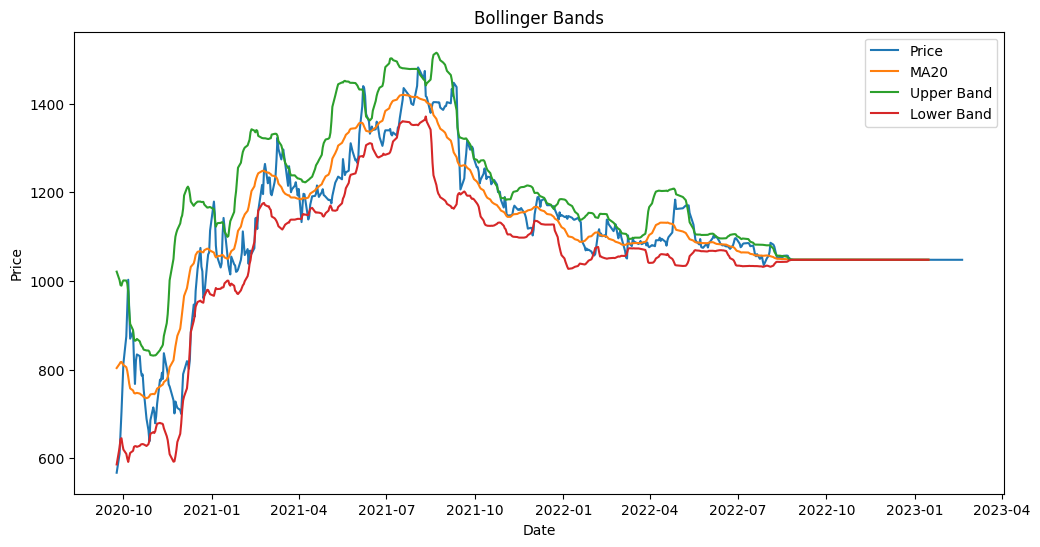

In [116]:

# Calculate the 20-day moving average
df['MA20'] = df['Price'].rolling(window=20).mean()

# Calculate the standard deviation of the price over the last 20 days
df['stddev'] = df['Price'].rolling(window=20).std()

# Calculate the upper and lower Bollinger Bands
df['UpperBand'] = df['MA20'] + 2 * df['stddev']
df['LowerBand'] = df['MA20'] - 2 * df['stddev']

# Plot the Bollinger Bands and the stock price
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Price')
plt.plot(df['Date'], df['MA20'], label='MA20')
plt.plot(df['Date'], df['UpperBand'], label='Upper Band')
plt.plot(df['Date'], df['LowerBand'], label='Lower Band')
plt.legend()
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### RSI( Relative Strength Index)

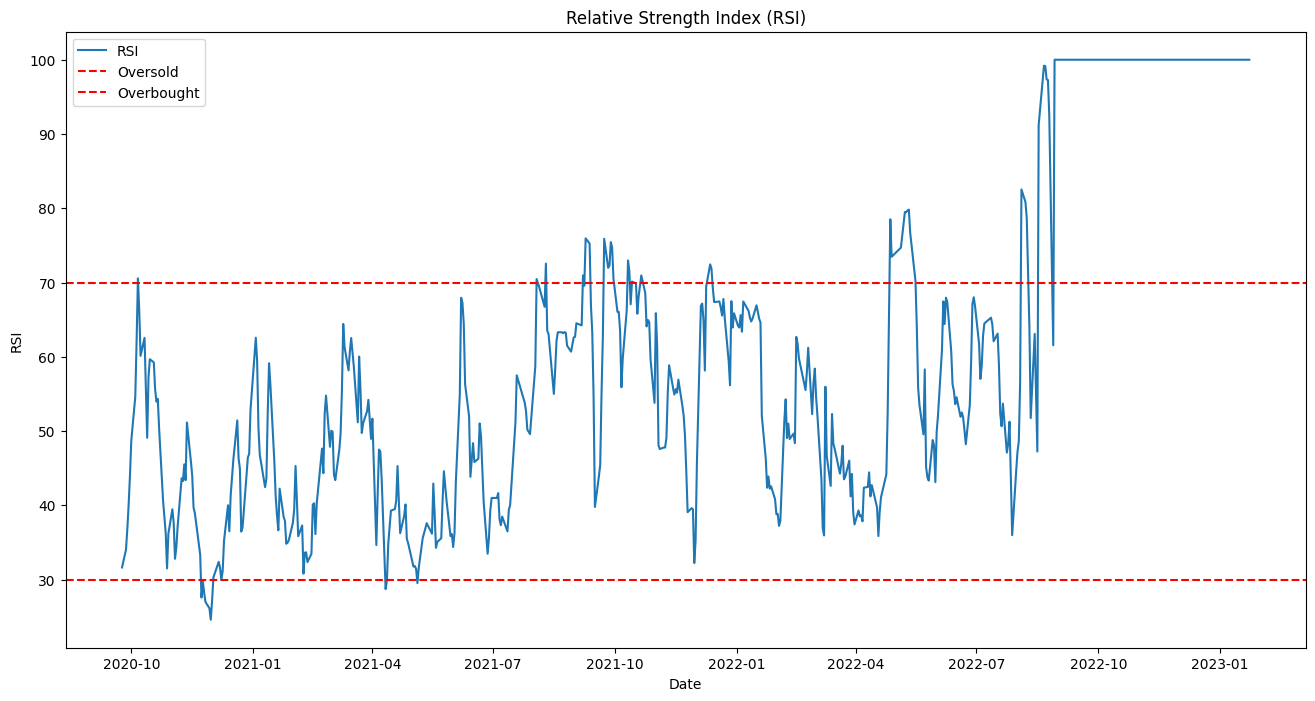

In [117]:
# Calculate RSI using TA library
df['rsi'] = ta.momentum.RSIIndicator(close=df['Price'], window=14).rsi()

# Plot RSI using matplotlib
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(df['Date'], df['rsi'], label='RSI')
ax.axhline(y=30, color='r', linestyle='--', label='Oversold')
ax.axhline(y=70, color='r', linestyle='--', label='Overbought')
ax.set_title('Relative Strength Index (RSI)')
ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.legend()
plt.show()

### SMA( Simple Moving Average)

Text(0.5, 0, 'Date')

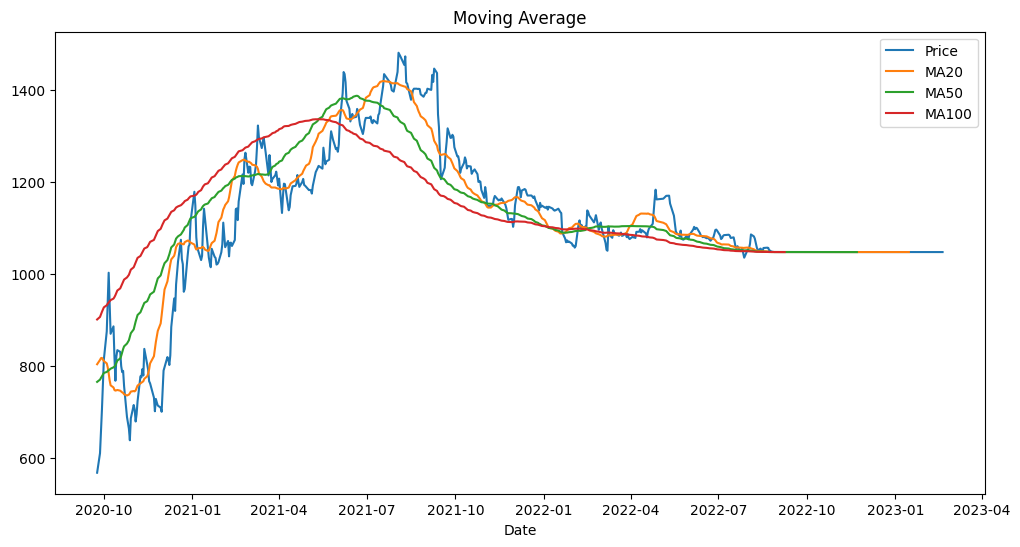

In [119]:
# Moving Average
df['MA20'] = df['Price'].rolling(window=20).mean()
df['MA50'] = df['Price'].rolling(window=50).mean()
df['MA100'] = df['Price'].rolling(window=100).mean()
 
# Plot the moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Price')
plt.plot(df['Date'], df['MA20'], label='MA20')
plt.plot(df['Date'], df['MA50'], label='MA50')
plt.plot(df['Date'], df['MA100'], label='MA100')
plt.legend()
plt.title('Moving Average')
plt.xlabel('Date')

### MACD ( Moving Average Convergence Divergence)

Text(0.5, 0, 'Date')

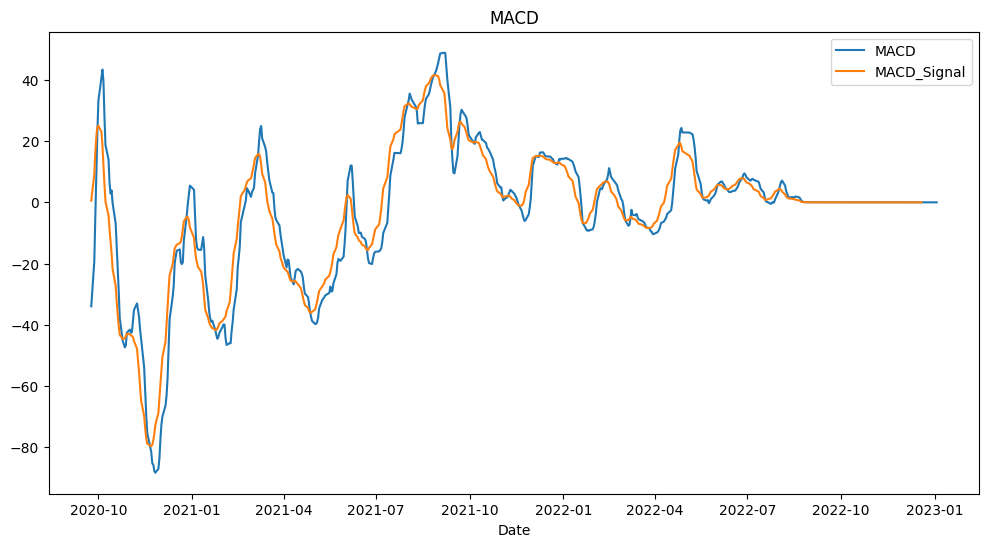

In [120]:
# MACD
df['MACD'] = ta.trend.MACD(close=df['Price'], window_slow=26, window_fast=12, window_sign=9).macd()
df['MACD_Signal'] = ta.trend.MACD(close=df['Price'], window_slow=26, window_fast=12, window_sign=9).macd_signal()
df['MACD_Histogram'] = ta.trend.MACD(close=df['Price'], window_slow=26, window_fast=12, window_sign=9).macd_diff()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.plot(df['Date'], df['MACD_Signal'], label='MACD_Signal')
plt.legend()
plt.title('MACD')
plt.xlabel('Date')